# UBC Scientific Software Seminar

## October 14, 2016

Today's Agenda:

1. Regression Example: Diabetes dataset
  * Fit and evaluate the model
  * A closer look at least squares linear regression calculations
  * A closer look at the R2 coefficient
  * Can we improve R2? Let's create more features
  * Splitting the dataset: Training data and testing data
2. Classification Example: Hand-written digits dataset
  * K-nearest neighbors classifier
  * Evaluating the model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### 1. Example: Diabetes dataset

We explored this dataset last time including some of the documentation describing the features and the response variable. See the [notes](2016-10-07-notes.ipynb).

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

In [4]:
diabetes.keys()

dict_keys(['target', 'data'])

In [5]:
X = diabetes.data
y = diabetes.target

#### Fit and evaluate the model

Let's fit the model on the data and use the `.score` method to compute the R2 coefficient.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()

In [8]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
reg.score(X,y)

0.51774942541329338

#### A closer look at least squares linear regression calculations

Let's take a closer look at what happens when we call `.fit` and `.score`. First of all, `.fit` computes the coefficients of the linear model using least squares. We can see this by first inspecting what coefficients and intercept were computed by `.fit`:

In [10]:
reg.coef_

array([ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
       -792.18416163,  476.74583782,  101.04457032,  177.06417623,
        751.27932109,   67.62538639])

In [11]:
reg.intercept_

152.13348416289651

And now we can do the computation ourselves and compare. The linear model

$$
y = a_0 + a_1X_1 + \cdots + a_mX_m
$$

which best fits the data points ($n$ samples with $m$ features)

$$
(x_{1,1},x_{1,2},\dots,x_{1,m},y_1), (x_{2,1},x_{2,2},\dots,x_{2,m},y_2), \dots, (x_{n,1},x_{n,2},\dots,x_{n,m},y_n)
$$

is determined by the [equation](https://en.wikipedia.org/wiki/Least_squares#Linear_least_squares) (the **least squares linear regression model**)

$$
A = (X^T X)^{-1} X^T y
$$

where

$$
X = \begin{bmatrix}
1 & x_{1,1} & x_{1,2} & \dots & x_{1,m} \\
1 & x_{2,1} & x_{2,2} & \dots & x_{2,m} \\
& & \vdots & & \\
1 & x_{n,1} & x_{n,2} & \dots & x_{n,m}
\end{bmatrix}
\hspace{5mm}
y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix}
\hspace{5mm}
A = \begin{bmatrix} a_0 \\ a_1 \\ \vdots \\ a_m \end{bmatrix}
$$

and so we can compute (using a little linear algebra with NumPy amtrices):

In [12]:
Xm = np.matrix( np.hstack((np.ones(442).reshape(442,1),X)) ) # Array X as a NumPy matrix
ym = np.matrix(y).T # Array y as a NumPy matrix

In [13]:
A = (Xm.T * Xm)**(-1) * Xm.T * ym # Compute the coefficients

And now we see that the coefficients and intercept calculated by `.fit` in our sklearn LinearRegression model are the same:

In [14]:
A

matrix([[ 152.13348416],
        [ -10.01219782],
        [-239.81908937],
        [ 519.83978679],
        [ 324.39042769],
        [-792.18416163],
        [ 476.74583782],
        [ 101.04457032],
        [ 177.06417623],
        [ 751.27932109],
        [  67.62538639]])

#### A closer look at the R2 coefficient

The [R2 coefficient](https://en.wikipedia.org/wiki/Coefficient_of_determination) is defined by

$$
R^2 = 1 - \frac{ \sum_i (y_i - \hat{y}_i )^2}{\sum_i (y_i - \overline{y})^2}
$$

where $\hat{y}_i$ are predited values, $y_i$ are actual values and $\overline{y}$ is the mean of $y_1, \dots, y_n$. We can compute R2 ourselves:

In [15]:
R2 = 1 - np.sum((y - reg.predict(X))**2)/np.sum((y - np.mean(y))**2)

In [16]:
R2

0.51774942541329338

This is exactly what `.score` is computing for our model:

In [17]:
reg.score(X,y)

0.51774942541329338

#### Can we improve R2? Let's create more features

How can we improve the R2? Let's introduce more features. For example, instead of considering a linear model, we can introduce the squares of the variables and consider a quadratic model:

In [18]:
Xnew = np.hstack((X,X**2)) # New feature array has 20 features

In [19]:
Xnew.shape

(442, 20)

In [20]:
reg.fit(Xnew,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
reg.score(Xnew,y)

0.54615964594306987

This seems to improve R2 a little bit however...

#### Splitting the dataset: Training data and testing data

We evaluated our data with the same data used to train the model. This is very bad practice! We should have split the data into a training set and testing set! We can do this manually:

In [22]:
num_samples = 300
X_train = Xnew[:num_samples,:]
X_test = Xnew[num_samples:,:]
y_train = y[:num_samples]
y_test = y[num_samples:]

In [23]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
reg.score(X_test,y_test)

0.4886840015566345

scikit-learn has a method for randomly splitting the data into a training set and a testing set:

In [25]:
from sklearn.cross_validation import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Xnew,y,test_size=0.3)

In [27]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
reg.score(X_test,y_test)

0.49723441271848501

### 2. Hand-written digits dataset

The digits dataset is another builtin dataset in sklearn. This is our first example of a classification problem: use the data to create a model which will predict the correct digit for a new image sample.

In [29]:
from sklearn.datasets import load_digits

In [30]:
digits = load_digits()

In [31]:
digits.keys()

dict_keys(['target_names', 'target', 'data', 'DESCR', 'images'])

In [32]:
images = digits.images

In [33]:
images.shape

(1797, 8, 8)

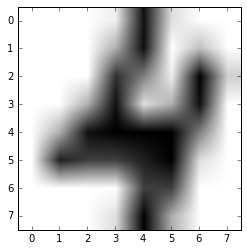

In [34]:
plt.imshow(images[1001,:,:],cmap='binary')

The `images` array is a 3D array where, for each index `i`, the 2D array `images[i,:,:]` is a numeric array which represents an 8 by 8 pixel image of a hand-written digit.

In [35]:
images[1001,:,:]

array([[  0.,   0.,   0.,   1.,  15.,   2.,   0.,   0.],
       [  0.,   0.,   0.,   5.,  15.,   0.,   4.,   0.],
       [  0.,   0.,   0.,  13.,   8.,   1.,  16.,   3.],
       [  0.,   0.,   5.,  15.,   2.,   5.,  15.,   0.],
       [  0.,   5.,  15.,  16.,  16.,  16.,   8.,   0.],
       [  0.,  14.,  12.,  12.,  14.,  16.,   2.,   0.],
       [  0.,   0.,   0.,   0.,  12.,  12.,   0.,   0.],
       [  0.,   0.,   0.,   2.,  16.,   5.,   0.,   0.]])

#### K-nearest neighbors classifier

The [K-nearest neighbors classifier](http://scikit-learn.org/stable/modules/neighbors.html#classification) is simple to understand: given our set of known digits as points in 64-dimensional space, look at a new sample as a new points in 64D and look at the labels of the K-nearest points in our training set to predict the correct label.

In [36]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [37]:
clf = KNN(n_neighbors = 10)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [39]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [40]:
clf.score(X_test,y_test)

0.98148148148148151

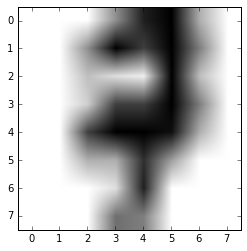

In [41]:
plt.imshow(X_test[10,:].reshape(8,8),cmap='binary')

In [42]:
clf.predict(X_test[10,:].reshape(1,64))

array([7])

Easy as that! We have a model which is 97.6% accurate on our testing data!